In [1]:
!pip install langchain langgraph langchain-google-genai google-generativeai

INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [2]:
from google.colab import userdata

from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

from typing import TypedDict

In [11]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    number_of_fours: int
    number_of_sixes: int
    strike_rate: float
    balls_per_boundry: float
    boundry_percentage: float
    summary: str

In [21]:
def calculate_strike_rate(state: BatsmanState) -> BatsmanState:
  strike_rate = (state['runs'] / state['balls']) * 100

  return {'strike_rate': strike_rate}

In [22]:
def calculate_balls_per_boundry(state: BatsmanState) -> BatsmanState:
  balls_per_boundry = state['balls'] / (state['number_of_fours'] + state['number_of_sixes'])

  return {'balls_per_boundry': balls_per_boundry}

In [23]:
def calculate_boundry_percentage(state: BatsmanState) -> BatsmanState:
  boundry_percentage = (((state['number_of_fours'] * 4) + (state['number_of_sixes'] * 7)) / state['runs']) * 100

  return {'boundry_percentage': boundry_percentage}

In [24]:
def summary(state: BatsmanState) -> BatsmanState:
  summary = f"""
  Strike Rate - {state['strike_rate']}
  Balls per Boundry - {state['balls_per_boundry']}
  Boundry Percentage - {state['boundry_percentage']}
  """

  return {'summary': summary}

In [25]:
graph = StateGraph(BatsmanState)

In [26]:
graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_balls_per_boundry', calculate_balls_per_boundry)
graph.add_node('calculate_boundry_percentage', calculate_boundry_percentage)
graph.add_node('summary', summary)

In [27]:
graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_balls_per_boundry')
graph.add_edge(START, 'calculate_boundry_percentage')

graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_balls_per_boundry', 'summary')
graph.add_edge('calculate_boundry_percentage', 'summary')

graph.add_edge('summary', END)

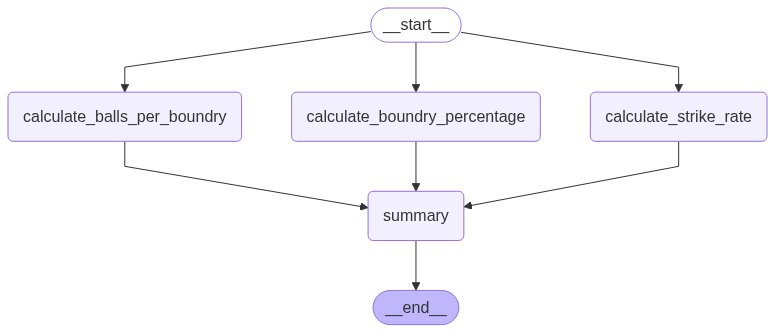

In [28]:
workflow = graph.compile()
workflow

In [29]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'number_of_fours': 6,
    'number_of_sixes': 3
}

final_state = workflow.invoke(initial_state)

In [30]:
print(final_state)

{'runs': 100, 'balls': 50, 'number_of_fours': 6, 'number_of_sixes': 3, 'strike_rate': 200.0, 'balls_per_boundry': 5.555555555555555, 'boundry_percentage': 45.0, 'summary': '\n  Strike Rate - 200.0\n  Balls per Boundry - 5.555555555555555\n  Boundry Percentage - 45.0\n  '}
